In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
train_df = pd.read_csv('data/train_clean_1.csv')
train_df.sample(3)

,DateTime,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
419784,2009-06-22 00:25:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Monday,INGLESIDE,"ARREST, CITED",3300 Block of MISSION ST,-122.421644,37.742997,2009,6,0
650378,2006-02-22 10:15:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,NORTHERN,NONE,GOUGH ST / EDDY ST,-122.424109,37.782476,2006,2,10
104099,2013-12-24 11:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,TARAVAL,NONE,900 Block of JUNIPERO SERRA BL,-122.472592,37.720087,2013,12,11


## The 'Category' column

#### It describes the Category of the crime commited. Let's check all the values it can take

In [6]:
all_cats = train_df.Category.unique()
all_cats, len(all_cats)

(array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
        'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
        'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
        'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
        'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
        'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
        'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
        'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
        'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
        'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
        'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
       dtype=object), 39)

- We can see that there are in total **39 unique values** this column can take
- Let's see how many crimes there are in each category to get a glimpse of the distribution :

In [7]:
gb = (train_df.groupby('Category')['Descript'].count()/len(train_df))*100
assert int(gb.sum()) == 100
gb.sort_values(inplace=True)
gb

Category
TREA                            0.000683
PORNOGRAPHY/OBSCENE MAT         0.002506
GAMBLING                        0.016628
SEX OFFENSES NON FORCIBLE       0.016856
EXTORTION                       0.029156
BRIBERY                         0.032914
BAD CHECKS                      0.046239
FAMILY OFFENSES                 0.055919
SUICIDE                         0.057856
EMBEZZLEMENT                    0.132794
LOITERING                       0.139514
ARSON                           0.172314
LIQUOR LAWS                     0.216731
RUNAWAY                         0.221628
DRIVING UNDER THE INFLUENCE     0.258300
KIDNAPPING                      0.266614
RECOVERED VEHICLE               0.357383
DRUNKENNESS                     0.487444
DISORDERLY CONDUCT              0.492000
SEX OFFENSES FORCIBLE           0.499744
STOLEN PROPERTY                 0.517055
TRESPASS                        0.834350
PROSTITUTION                    0.852344
WEAPON LAWS                     0.974319
SECONDA

#### We can clearly see that 15 of the categories account for ~93% of the crimes ! ( whereas the remaining 24 categories account only for ~7% )
- Let's make a quick visualization :

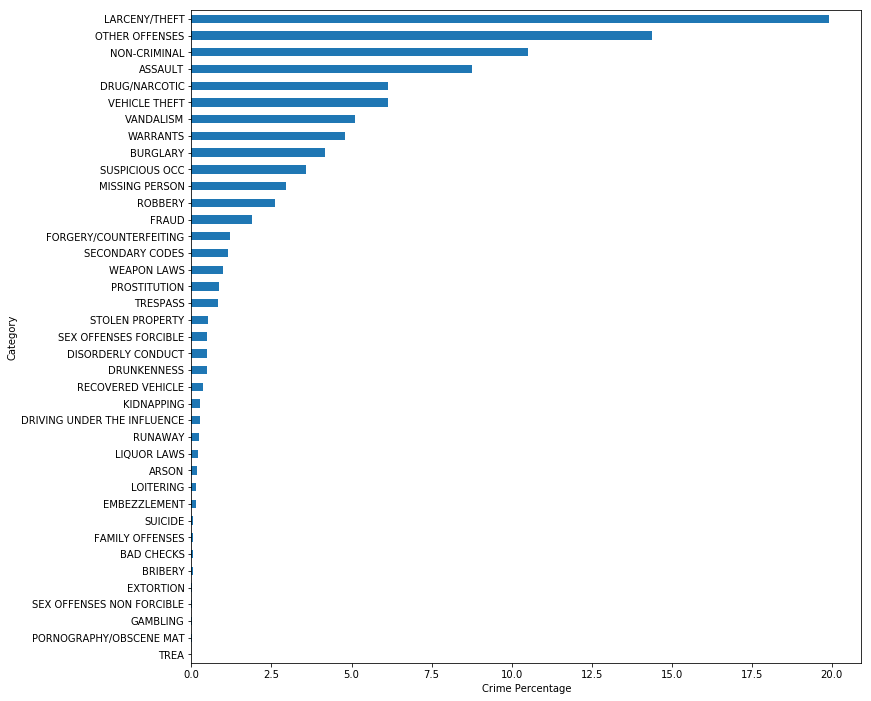

In [8]:
ax = gb.plot(kind='barh', figsize=(12,12) )
ax.set_xlabel('Crime Percentage')